# Защита персональных данных клиента

Страховой компании необходимо защитить данные клиентов без потери качества машинного обучения.

## Загрузка данных

Импортируем нужные библиотеки и отключаем предупреждения

In [1]:
import pandas as pd
import numpy as np
import numpy.random as rand
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

Открываем и изучаем данные

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


**Поиск дубликатов и их удаление**

In [3]:
print(df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print(df.duplicated().sum())

153
0


**Исследование клиентов**

In [4]:
df['Пол'].value_counts()

0    2431
1    2416
Name: Пол, dtype: int64

In [5]:
df['Страховые выплаты'].value_counts(normalize=True)

0    0.883846
1    0.087270
2    0.023520
3    0.003714
4    0.001444
5    0.000206
Name: Страховые выплаты, dtype: float64

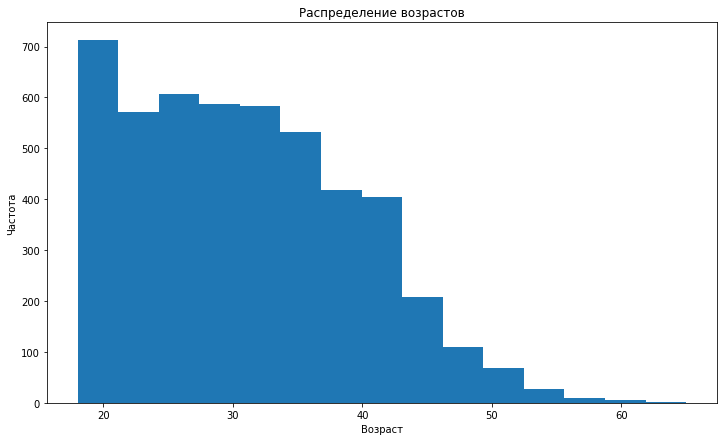

count    4847.000000
mean       31.023932
std         8.487995
min        18.000000
25%        24.000000
50%        30.000000
75%        37.000000
max        65.000000
Name: Возраст, dtype: float64

In [6]:
plt.figure(figsize=(12, 7))
plt.hist(df['Возраст'], bins=15)
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()
df['Возраст'].describe()

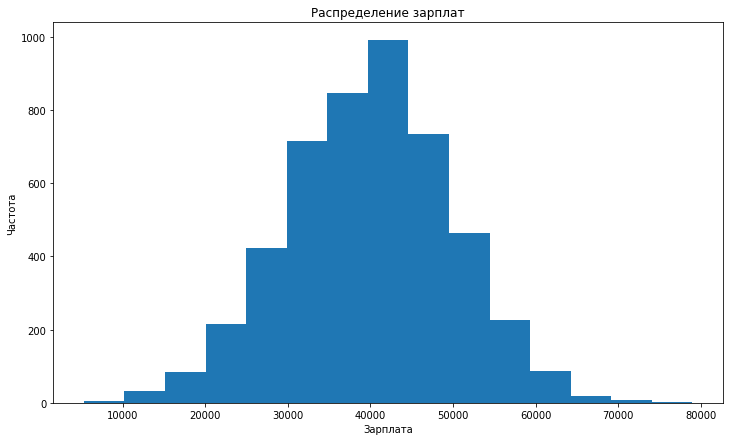

count     4847.000000
mean     39895.811842
std       9972.953985
min       5300.000000
25%      33200.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

In [7]:
plt.figure(figsize=(12, 7))
plt.hist(df['Зарплата'], bins=15)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()
df['Зарплата'].describe()

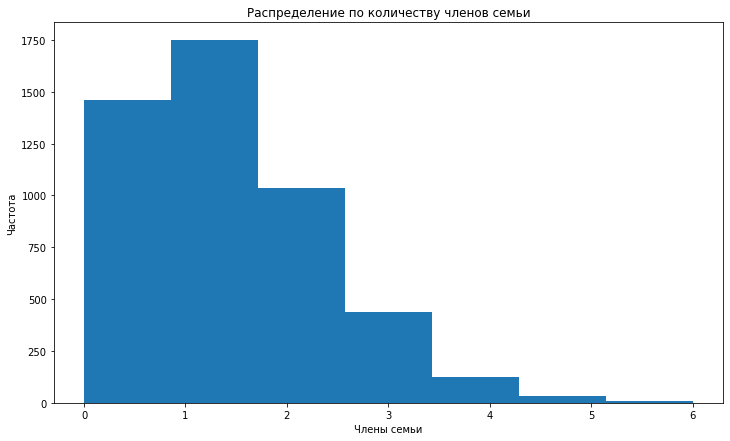

count    4847.000000
mean        1.203425
std         1.098664
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Члены семьи, dtype: float64

In [8]:
plt.figure(figsize=(12, 7))
plt.hist(df['Члены семьи'], bins=7)
plt.title('Распределение по количеству членов семьи')
plt.xlabel('Члены семьи')
plt.ylabel('Частота')
plt.show()
df['Члены семьи'].describe()

,Возраст,Зарплата
Возраст,1.000000,-0.017386
Зарплата,-0.017386,1.000000


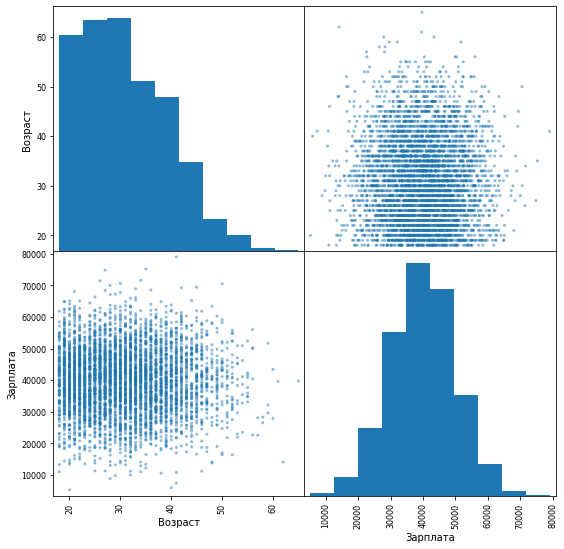

In [9]:
display(df[['Возраст', 'Зарплата']].corr())
pd.plotting.scatter_matrix(df[['Возраст', 'Зарплата']], figsize=(9,9))                  
plt.show()

**Выводы**

* 88% клиентов не получали страховых выплат, 8.7% получали одну выплату и 2.4% - две. Клиентов, получивших больше 2 выплат суммарно менее 1%.

* Среди клиентов компании примерно равное количество мужчин и женщин.

* Возраст клиентов варьируется от 18 до 65 лет. Средний возраст около 30 лет. Клиенты 18-35 лет представлены примерно в равном количестве, после 35 количество клиентов снижается.

* Доходы клиентов распределены нормально и варьируются от 5300 до 79000. Максимум распределения приходится на клиентов с зарплатой в 40000.

* По количеству детей чаще всего встречаются клиенты без членов семьи, с 1 или 2. Максимум распределения - клиенты с 1 членом семьи.

* Корреляции между возрастом и доходом клиентов не обнаружили.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 
не изменится

**Обоснование:** 
$$
a = Xw
$$
$$
w = (X^T X)^{-1} X^T y
$$

Совмещаем уравнения:
$$ a = X (X^T X)^{-1} X^T y
$$

Домножаем матрицу признаков на обратимую матрицу P:
$$
L = X P
$$
Подставляем новую матрицу в уравнение:
$$
a = X P ((XP)^T XP)^{-1} (XP)^T y
$$

Раскрываем скобки:
$$
a = XP(P^T X^T X P)^{-1} P^T X^T y
$$

$$
a = XP (P)^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Сокращаем умножение матриц на обратные себе:
$$
a = X(X^T X)^{-1} X^T y
$$

Но 
$$
(X^T X)^{-1} X^T y = w
$$
Поэтому 
$$
a = Xw
$$

## Алгоритм преобразования

**Алгоритм**

1) Выделим признаки и целевой признак из выборки.

2) Разделим выборку на обучающую и тестовую.

3) Создадим дополнительные выборки с зашифрованными признаками.

4) Обучим модель линейной регрессии на исходной обучающей выборке и проверим качество по метрике R2.

5) Обучим модель линейной регрессии на шифрованной обучающей выборке и проверим качество по метрике R2.

6) Сравним результаты.

7) Проверим модели на тестовых выборках (обучающей и шифрованной).

**Обоснование**

Исходя из теоретического обоснования, результаты R2 на обычной и шифрованной выборках не должны отличаться. Проверим это утверждение.

## Проверка алгоритма

Разделяем признаки и целевой признак

In [10]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Создаем обучающую и тестовую выборки

In [11]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                                        test_size=0.25, random_state=12345)

Шифруем признаки

In [12]:
def rnd_matrix(n):
    random_matrix = np.random.normal(size=(n, n))
    try:
        np.linalg.inv(random_matrix) 
    except LinAlgError: 
        rnd_matrix(n)
    return random_matrix

features_encrypted_train = np.dot(features_train, rnd_matrix(4))
features_encrypted_test = np.dot(features_test, rnd_matrix(4))

Создаем оценщик моделей на основе R2

In [13]:
score = make_scorer(r2_score, greater_is_better=True)

Обучаем модели и проверяем качество на кросс-валидации

In [14]:
model = LinearRegression()
res_1 = cross_val_score(model, features_train, target_train, scoring = score, cv=5).mean()
print(res_1)

0.4307365235424034


In [15]:
res_2 = cross_val_score(model, features_encrypted_train, target_train, scoring = score, cv=5).mean()
print(res_2)

0.430736523542447


**Вывод**

На обоих обучающих выборках (обычной и зашифрованной) результаты не отличаются. 

Проверяем модель на тестовых выборках

In [16]:
res_1_test = cross_val_score(model, features_test, target_test, scoring = score, cv=5).mean()
print(res_1_test)

0.42294230693779555


In [17]:
res_2_test = cross_val_score(model, features_encrypted_test, target_test, scoring = score, cv=5).mean()
print(res_2_test)

0.4229423069379594


На тестовой выборке отличий так же нет. 

## Вывод

Теоретически и практически доказали, что можно зашифровать данные клиентов с помощью умножения на обратимую матрицу, не жертвуя качеством предсказаний. 